##ASL Model 

#input: image path
#output: predicted sign (0-9 or a-z, or space,delete)

In [1]:
import numpy as np
import cv2
import os
import keras
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
working_dir = '/content/drive/My Drive/Computer Vision Project'

In [3]:
cd '$working_dir'

/content/drive/My Drive/Computer Vision Project


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np
import cv2
import os
import keras

In [5]:
# load json and create model
json_file = open('aslmodel2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("aslmodel2.h5")
print("Loaded model from disk")

Loaded model from disk


In [6]:
#Compile the loaded model
loaded_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
#Define the target classes accroding to the same order in the model:
categories =['0','1','2','3','4','5','6','7','8','9','a','b','c','d','del','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','space','t','u','v','w','x','y','z'];

In [11]:
#reading and normalizing
image =cv2.resize(cv2.imread('Datasets/combined/a'+'/'+'hand5_a_bot_seg_1_cropped.jpeg'),(64,64))
#image = cv2.imread('Datasets/combined/a'+'/'+'hand5_a_bot_seg_1_cropped.jpeg')
print(image.shape)
imagetest= image.astype('float32')/255.0
imagetest = np.array([imagetest])


(64, 64, 3)


Populating the interactive namespace from numpy and matplotlib


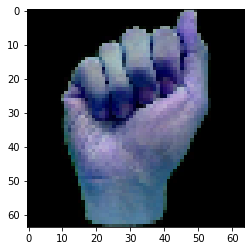

In [20]:
%pylab inline

imshow(image)


In [ ]:
#prdeict the given hand sign 
y_test_pred = loaded_model.predict(imagetest, batch_size = 64, verbose = 0)

In [ ]:
#map the propaplites to the corresponding sign.
predicted_sign=categories[np.argmax(y_test_pred)]

In [ ]:
predicted_sign

'a'